### 数据来源

这个项目的数据来源于UCI机器学习库。
波士顿住房数据是在1978年收集的，506个条目中的每一个都代表了来自马萨诸塞州波士顿不同郊区的14个住宅特征的汇总数据。

In [1]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 导入数据
data = pd.read_csv('housing.csv')
data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


**特征**
* RM：每个住宅的平均房间数
* LSTAT：被认为阶层较低的人口百分比
* PTRATIO：城镇师生比例

In [3]:
prices = data['MEDV']
print(prices)

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64


In [4]:
# 提取特征
features = data.drop('MEDV', axis = 1)
print(features)

        RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
484  6.593   9.67     21.0
485  6.120   9.08     21.0
486  6.976   5.64     21.0
487  6.794   6.48     21.0
488  6.030   7.88     21.0

[489 rows x 3 columns]


### 数据预处理

In [5]:
# 查看数据的基本特征
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
# 查看缺失值比率
data.isnull().sum() / data.shape[0]

RM         0.0
LSTAT      0.0
PTRATIO    0.0
MEDV       0.0
dtype: float64

查看房间数量的分布以及与出售价格的关系

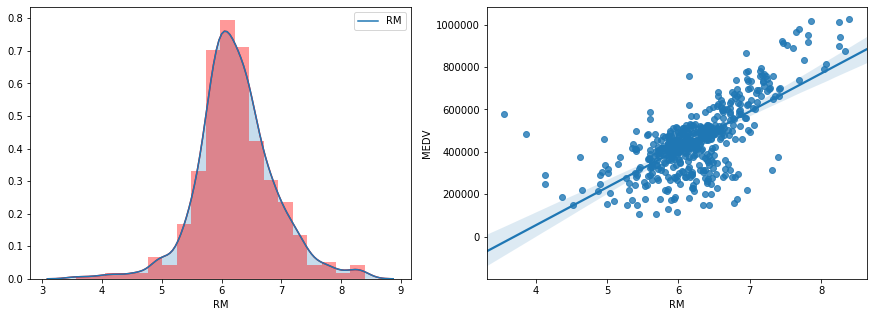

In [7]:
figure, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 房间数量的分布情况
sns.distplot(data['RM'], bins=20, ax=ax1, color='r')
sns.kdeplot(data['RM'], shade=True, ax=ax1)
# 房间数量和出售价格的关系
sns.regplot(x='RM', y='MEDV', data=data, ax=ax2)
plt.show()

查看阶级较低的人口百分比与出售价格的关系

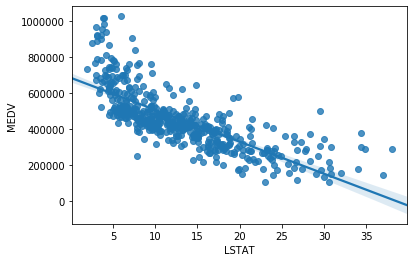

In [8]:
sns.regplot(x='LSTAT', y='MEDV', data=data)
plt.show()

查看师生比例与房屋价格的关系

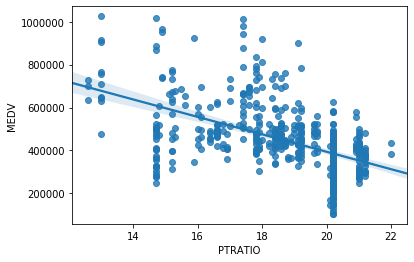

In [9]:
sns.regplot(x='PTRATIO', y='MEDV', data=data)
plt.show()

### 数据标准化处理

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
std_data = ss.fit_transform(data)
std_data = pd.DataFrame(std_data, columns=["RM", "LSTAT", "PTRATIO", "MEDV"])
std_data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,0.520554,-1.125077,-1.525083,0.300640
1,0.281048,-0.537070,-0.339748,-0.004498
2,1.469245,-1.259357,-0.339748,1.661047
3,1.178417,-1.413427,0.086973,1.495764
4,1.410146,-1.075605,0.086973,1.851759
5,0.295045,-1.092567,0.086973,0.898202
6,-0.355041,-0.072035,-1.572497,0.160785
7,-0.106204,0.877822,-1.572497,0.694777
8,-0.947584,2.401552,-1.572497,-0.652916
9,-0.367483,0.588059,-1.572497,-0.347778


### 建立模型

In [11]:
# 损失函数
def compute_cost(h, y):
    cost = np.power((h - y), 2)
    return np.sum(cost) / (2 * len(X))

# 梯度下降函数
def gradient_descent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    cost = np.zeros(iters)
    para_num = int(np.ravel(theta).shape[0])
    # while true
    for i in range(iters):
        error = np.dot(X, theta.T) - y
        # 计算梯度
        for j in range(para_num):
            term = error * X[:, j].reshape(error.shape)
            temp[0, j] = theta[0, j] - (alpha / len(X)) * np.sum(term)
        theta = temp
        h = np.dot(X, theta.T)
        loss = compute_cost(h, y)
        costJ.append(loss)
    return theta

In [12]:
# 训练模型
alpha = 0.00001
theta = np.array([[0, 0, 0, 0]])
iters = 200000
costJ = []
num_examples = len(data)
y = np.array(std_data['MEDV'])
y = y.reshape(len(y), 1)
X = np.array(std_data.copy().drop(['MEDV'], axis=1))
X = np.insert(X, 0, values=np.ones(num_examples), axis=1)
theta = gradient_descent(X, y, theta, alpha, iters)
print(theta)
print(costJ[-1])

[[ 4.99861584e-16  3.51410579e-01 -4.23403178e-01 -2.54026635e-01]]
0.14173801171091874


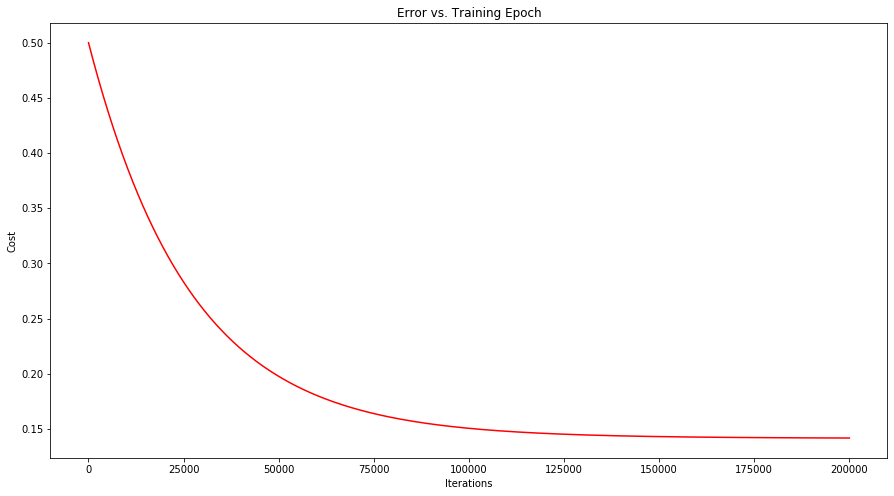

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.arange(iters), costJ,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

使用sklearn中的train_test_split函数，进行训练集和测试集的切分。

使用判定系数$R^2$对模型效果进行评价。
$$
\begin{split}
R^2&=\frac{SSR}{SST}=1-\frac{SSE}{SST} \\
SST&=SSR+SSE \\
SST&=\sum_i(y_i-\bar{y})^2 \\
SSR&=\sum_i{(\widehat{y}_i}-\bar{y})^2 \\
SSE&=\sum_i(y_i-{\widehat{y}_i}）^2=\sum_ie_i^2
\end{split}
$$
SST为总平方和，SSR为回归平方和，SSE为残差平方和。

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 预测数据
client_data = [[5, 17, 15], 
                       [4, 32, 22], 
                       [8, 3, 12]]  

y = data['MEDV']
X = data.copy().drop(['MEDV'], axis=1)

# 划分训练集和测试集，80%为测试集，20%为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [15]:
# 建立函数，可调用不同模型，绘制图形对比模型效果，并做预测
def try_different_method(model):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    result = model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, 'go-', label='true value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    plt.title('score: %f' % score)
    plt.legend()
    plt.show()
    model_prediction = model.predict(client_data)
    print('预测结果为：', model_prediction)

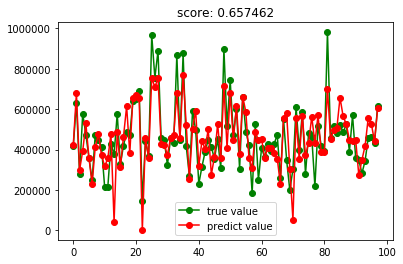

预测结果为： [373572.7390996  -17505.65746019 839681.13126728]


In [16]:
# 线性回归
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
try_different_method(linear_reg)

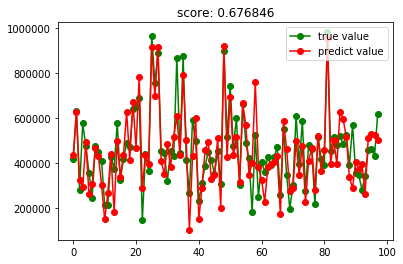

预测结果为： [426300. 277200. 789600.]


In [17]:
# 决策树回归
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_different_method(tree_reg)

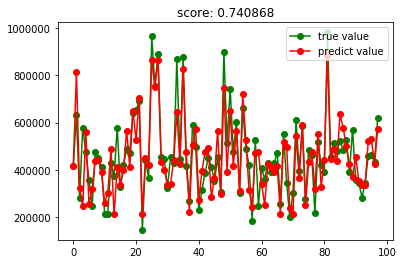

预测结果为： [375480. 162120. 921900.]


In [18]:
# KNN
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
try_different_method(knn)

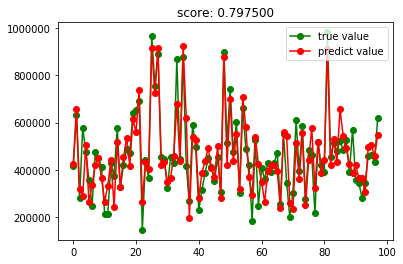

预测结果为： [332745. 221235. 908565.]


In [19]:
# 随机森林
from sklearn import ensemble
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
try_different_method(rf)

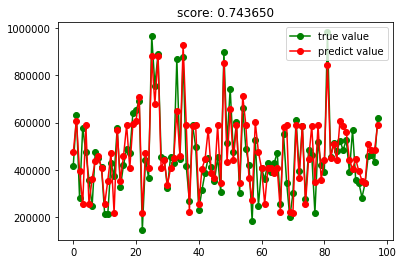

预测结果为： [389479.21348315 218950.81967213 931827.27272727]


In [20]:
# Adaboost
ada = ensemble.AdaBoostRegressor(n_estimators=50)
try_different_method(ada)

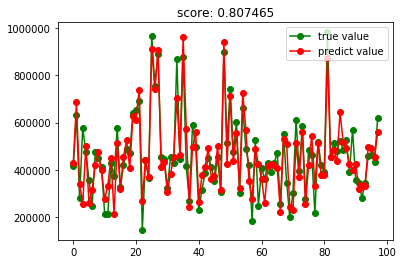

预测结果为： [314616.09693378 201354.12310959 840644.87039343]


In [21]:
# GBRT
gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)
try_different_method(gbrt)